In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import iberoSignalPro.preprocesa as ib
from sklearn.preprocessing import StandardScaler
import os


## Funciones

In [6]:
from statstools import *

## Carga de datos Particular

In [ ]:
df = pd.read_csv("C:/Users/yomerengues/OneDrive/Escritorio/InternadoFMM/Pruebas%20BCI/SeñalesProcesadas10Hz/ElShrek/S3/10deTorquePre.csv")
fs = 10
df.head()


,HRV,RRV,EnvAnta,EnvAgo,Torque,Posicion,Binaria,alfa_FC3,mu_FC3,beta_FC3,...,beta_O1,gamma_O1,alfa_Oz,mu_Oz,beta_Oz,gamma_Oz,alfa_O2,mu_O2,beta_O2,gamma_O2
0,84.106647,29.926700,0.030899,0.074495,5466.483687,5854.409648,0.0,0.063987,0.038123,0.125355,...,0.109372,0.569977,0.029274,0.033889,0.166668,0.550735,0.020251,0.021207,0.121241,0.536288
1,81.654835,29.351078,0.030622,0.094124,5590.051374,5724.142876,0.0,0.067701,0.044195,0.174126,...,0.143355,0.533140,0.036107,0.061596,0.192444,0.529113,0.023491,0.029436,0.145159,0.516842
2,79.468519,28.826982,0.074000,0.199840,5587.745240,5724.919130,0.0,0.055940,0.044451,0.212817,...,0.170267,0.491445,0.036328,0.075934,0.222047,0.531761,0.030379,0.040094,0.153508,0.511042
3,77.542280,28.352338,0.039238,0.083768,5589.132343,5728.257239,0.0,0.041135,0.046913,0.236324,...,0.176559,0.493844,0.032332,0.068413,0.229988,0.545831,0.038349,0.043812,0.138677,0.546543
4,75.870694,27.925069,0.048947,0.115570,5587.225299,5727.237362,0.0,0.041763,0.057153,0.239396,...,0.169848,0.496393,0.027134,0.053245,0.218812,0.552920,0.039816,0.039503,0.130137,0.571854


In [8]:
alfa_columns = df.columns[df.columns.str.contains('alfa')]

In [9]:
df_analisis = df.iloc[:, 7:]
df_analisis.drop(columns=alfa_columns, inplace=True)
df_analisis["label"] = df["Binaria"].apply(lambda x: 'Actividad' if x > 0.5 else 'Reposo')
df_analisis.head()

C:\Users\fercy\AppData\Local\Temp\ipykernel_16804\2211839468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisis.drop(columns=alfa_columns, inplace=True)
C:\Users\fercy\AppData\Local\Temp\ipykernel_16804\2211839468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisis["label"] = df["Binaria"].apply(lambda x: 'Actividad' if x > 0.5 else 'Reposo')


,mu_FC3,beta_FC3,gamma_FC3,mu_FCz,beta_FCz,gamma_FCz,mu_FC4,beta_FC4,gamma_FC4,mu_CP3,...,mu_O1,beta_O1,gamma_O1,mu_Oz,beta_Oz,gamma_Oz,mu_O2,beta_O2,gamma_O2,label
0,0.038123,0.125355,0.313038,0.082556,0.178512,0.234274,0.053782,0.187248,0.346065,0.033842,...,0.039044,0.109372,0.569977,0.033889,0.166668,0.550735,0.021207,0.121241,0.536288,Reposo
1,0.044195,0.174126,0.299424,0.060317,0.170992,0.221113,0.047017,0.222992,0.301409,0.045246,...,0.057614,0.143355,0.533140,0.061596,0.192444,0.529113,0.029436,0.145159,0.516842,Reposo
2,0.044451,0.212817,0.283944,0.041134,0.159330,0.231662,0.037486,0.267874,0.272889,0.054402,...,0.068199,0.170267,0.491445,0.075934,0.222047,0.531761,0.040094,0.153508,0.511042,Reposo
3,0.046913,0.236324,0.287153,0.036999,0.163467,0.246242,0.032443,0.297416,0.265132,0.048586,...,0.065212,0.176559,0.493844,0.068413,0.229988,0.545831,0.043812,0.138677,0.546543,Reposo
4,0.057153,0.239396,0.296515,0.040134,0.191091,0.257232,0.035073,0.284914,0.266712,0.038090,...,0.055450,0.169848,0.496393,0.053245,0.218812,0.552920,0.039503,0.130137,0.571854,Reposo


In [10]:
columns = df_analisis.columns[:]
nombres_columnas = columns[columns != 'label'].values



# Carga de datos General

In [11]:
import os

In [12]:
def perform_ANOVA(file_path):
    df = pd.read_csv(file_path)
    alfa_columns = df.columns[df.columns.str.contains('alfa')]
    
    
    df_analisis = df.iloc[:, 7:].copy()
    df_analisis.drop(columns=alfa_columns, inplace=True)
    df_analisis["label"] = df["Binaria"].apply(lambda x: 'Actividad' if x > 0.5 else 'Reposo')



    p_values = []
    significant_columns = []
    for column in columns:
        if column != 'label':
            
            
            #test, p_val = compute_kruskal_wallis_anova(df_analisis, "label",  column)
            #test, p_val = compute_one_way_anova(df_analisis, "label",  column)
            
            test, p_val = compute_t_test(df_analisis, "label",  column)
            #test, p_val = compute_paired_t_test(df_analisis, "label",  column)
            
            if "mu" in column:
                thresh = 0.01
            elif "beta" in column:
                thresh = 0.01
            else:
                thresh = 0.01
            if(p_val < thresh):
                #sns.violinplot(x='label', y=column, data=df_analisis, hue='label', fill=False)
                #plt.show()
                p_values.append(p_val)
                significant_columns.append(column)
                print(f"Column: {column}, p-value: {p_val}")
            else:
                p_values.append(np.nan)
    return p_values

In [13]:

def read_csvs(folder_path):
    
    files = os.listdir(folder_path)

    csv_files = [file for file in files if file.endswith('.csv')]
    if not csv_files:
        print("No se encontraron archivos csv")
        return None, None, None
    
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        if csv_file == "10deTorquePre.csv":
            print("\t|-10")
            pval_10 = perform_ANOVA(file_path=file_path)
            
        elif csv_file == "5deTorquePre.csv":
            print("\t|-5")
            pval_5 = perform_ANOVA(file_path=file_path)
        elif csv_file == "pasivoPre.csv":
            print("\t|-pasivo")
            pval_0 = perform_ANOVA(file_path=file_path)
    
    pval_10 = np.array(pval_10)
    pval_5 = np.array(pval_5)
    pval_0 = np.array(pval_0)

    if pval_10.shape[0] == 0 or pval_5.shape[0] == 0 or pval_0.shape[0] == 0:
        print("No se encontraron archivos csv")
        return None, None, None
    return np.array(pval_10), np.array(pval_5), np.array(pval_0)

# Pruebas estadisticas entre las ventanas de reposo y actividad

Estas pruebas fueron realizadas en todos los registros, sin distinción de tipo de ejercicio

In [ ]:
pval_10 = []
pval_5 = []
p_val_0 = []

root_folder_path = rf'C:/Users/yomerengues/OneDrive/Escritorio/InternadoFMM/Pruebas%20BCI/SeñalesProcesadas10Hz/'

sub_sub_folders = []

items_in_root = os.listdir(root_folder_path)

sub_folders = [item for item in items_in_root if os.path.isdir(os.path.join(root_folder_path, item))]
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(root_folder_path, sub_folder)
    items_in_sub_folder = os.listdir(sub_folder_path)
    for item in items_in_sub_folder:
        item_path = os.path.join(sub_folder_path, item)
        if os.path.isdir(item_path):
            sub_sub_folders.append(item_path)
            try:
                print(item_path)
                pval_temp_10, pval_temp_5, pval_temp_0 = read_csvs(item_path)
                if pval_temp_10 is None or pval_temp_5 is None or pval_temp_0 is None:
                    continue
                pval_10.append(pval_temp_10)
                pval_5.append(pval_temp_5)
                p_val_0.append(pval_temp_0)
            except Exception as e:
                print(f"******************************** Error {e} en {item_path}")
                continue

C:/Users/fercy/OneDrive/Escritorio/InternadoFMM/Pruebas%20BCI/SeñalesProcesadas10Hz/AlejandoPayan\S1
	|-10
Column: mu_FC3, p-value: 1.891243677436998e-44
Column: beta_FC3, p-value: 3.718529692658021e-23
Column: gamma_FC3, p-value: 1.268640849005538e-18
Column: mu_FCz, p-value: 0.002753608872092023
Column: beta_FCz, p-value: 6.827742424185109e-26
Column: gamma_FCz, p-value: 5.306120814509359e-07
Column: mu_FC4, p-value: 0.00011553840030626713
Column: gamma_FC4, p-value: 2.1349329666995013e-31
Column: mu_CP3, p-value: 4.229776057333944e-52
Column: beta_CP3, p-value: 4.0426094870978346e-38
Column: gamma_CP3, p-value: 1.5858085613615492e-16
Column: mu_C3, p-value: 3.759529726292191e-14
Column: beta_C3, p-value: 1.1632541909447502e-14
Column: gamma_C3, p-value: 8.565619310525338e-19
Column: mu_C1, p-value: 5.587454774098818e-69
Column: beta_C1, p-value: 4.470732684840185e-44
Column: gamma_C1, p-value: 8.360474823228717e-11
Column: beta_Cz, p-value: 3.595614277095997e-122
Column: gamma_Cz, p

In [15]:
pval_10 = np.array(pval_10)
pval_5 = np.array(pval_5)
p_val_0 = np.array(p_val_0)

pval_10.shape, pval_5.shape, p_val_0.shape

((38, 48), (38, 48), (38, 48))

In [16]:

df_pval_10 = pd.DataFrame(pval_10, columns=nombres_columnas)
df_pval_10['Origen'] = 10

df_pval_5 = pd.DataFrame(pval_5, columns=nombres_columnas)
df_pval_5['Origen'] = 5

df_pval_0 = pd.DataFrame(p_val_0, columns=nombres_columnas)
df_pval_0['Origen'] = 0

df_combined = pd.concat([df_pval_10, df_pval_5, df_pval_0], ignore_index=True)

df.fillna(0, inplace=True)
df_combined.head()


,mu_FC3,beta_FC3,gamma_FC3,mu_FCz,beta_FCz,gamma_FCz,mu_FC4,beta_FC4,gamma_FC4,mu_CP3,...,mu_O1,beta_O1,gamma_O1,mu_Oz,beta_Oz,gamma_Oz,mu_O2,beta_O2,gamma_O2,Origen
0,1.891244e-44,3.718530e-23,1.268641e-18,2.753609e-03,6.827742e-26,5.306121e-07,1.155384e-04,NaN,2.134933e-31,4.229776e-52,...,2.528049e-06,NaN,NaN,2.668244e-06,2.538174e-15,1.101382e-29,NaN,1.168382e-03,5.238168e-25,10
1,7.532075e-04,2.436353e-09,1.974993e-14,3.445874e-06,1.067995e-53,1.750261e-18,4.699756e-32,5.679461e-33,5.176328e-19,6.352012e-13,...,NaN,NaN,9.597298e-40,2.805208e-16,3.367532e-07,1.849773e-57,NaN,3.960546e-06,2.667045e-28,10
2,2.524235e-19,1.233559e-48,2.012876e-03,1.351807e-31,8.932924e-60,NaN,2.825551e-37,2.878847e-51,6.689328e-03,6.466766e-66,...,1.488194e-59,1.336322e-64,NaN,1.463879e-43,4.113577e-61,NaN,9.376905e-43,1.120329e-92,1.518944e-04,10
3,3.406412e-162,6.856988e-73,5.584231e-19,8.666139e-191,6.848082e-62,3.366969e-32,1.779479e-195,2.277748e-55,1.639687e-50,0.000000e+00,...,7.842425e-84,6.637668e-53,6.863230e-98,1.349651e-130,3.389627e-29,1.353365e-105,3.823181e-141,2.639288e-67,1.501928e-88,10
4,2.849996e-13,9.540601e-24,5.577942e-20,1.636924e-11,2.557186e-36,1.708225e-26,1.423349e-06,7.604204e-15,1.501668e-38,9.259246e-20,...,NaN,1.380145e-06,1.070031e-20,2.120011e-03,6.376396e-03,6.132296e-05,NaN,NaN,6.681958e-03,10


In [17]:
df_combined.iloc[:, :-1].shape[0]*0.80

91.2

In [ ]:
df_combined = pd.concat([df_pval_10, df_pval_5, df_pval_0], ignore_index=True)

mean_pval_10 = np.nanmean(df_combined.iloc[:, :-1].values, axis=0)
std_pval_10 = np.nanstd(df_combined.iloc[:, :-1].values, axis=0)
count_non_nan = np.sum(~np.isnan(df_combined.iloc[:, :-1].values), axis=0)

combined = np.array([nombres_columnas, mean_pval_10, std_pval_10, count_non_nan], dtype=object).T
sorted_combined = combined[np.lexsort((mean_pval_10, -count_non_nan))]

print("Matriz ordenada:")
print(sorted_combined)

In [ ]:
lastindex = np.where(sorted_combined[:, 3].astype(float) > 0.80*df_combined.iloc[:, :-1].shape[0])[0][-1]
print(sorted_combined[:lastindex+1, :])
sorted_2 = sorted_combined[:lastindex+1, :]

In [20]:
significante_names = sorted_2[:, 0]

In [21]:
import mne

## Estos son los canales en cada banda que mostró diferencias significativas

In [22]:

mu_names = []
beta_names = []
gamma_names = []
for names in significante_names:
    if "mu" in names:
        mu_names.append(names.split("_")[1])
    elif "beta" in names:
        beta_names.append(names.split("_")[1])
    elif "gamma" in names:
        gamma_names.append(names.split("_")[1])

print("Banda\t|", "Canales")
print("___________________________________")
print("mu\t|", mu_names)
print("beta\t|", beta_names)
print("gamma\t|", gamma_names)

Banda	| Canales
___________________________________
mu	| ['CP4', 'C4', 'CP3', 'P3', 'Pz', 'C1', 'C3', 'P4', 'FC4', 'FCz', 'Cz', 'Oz']
beta	| ['FCz', 'CP3', 'Cz', 'P4', 'FC3', 'CP4', 'O2', 'FC4', 'C4', 'O1']
gamma	| ['FC3', 'FC4', 'FCz', 'O2', 'C1', 'C3', 'CP3']


# Obtención de promedios

In [23]:
ch_names = np.array(['FC3', 'FCz', 'FC4', 'CP3', 'C3', 'C1', 'Cz', 'C2', 'C4', 'CP4', 'P3', 'Pz', 'P4', 'O1', 'Oz', 'O2'], dtype=object)

In [24]:
def obtener_promedios_ventana(sig, ventanas_actividad, output='mean', log = False):
    promedios = []
    signal = sig[ventanas_actividad[0][0]: ventanas_actividad[0][1]]

    for ventana in ventanas_actividad[1:]:
        
        
        if ventana[0] < ventana[1]:
            signal = np.concatenate((signal, sig[ventana[0]: ventana[1]]), axis=0)
         
    promedios = np.array(signal)
    if output == 'mean':
        promedios = np.nanmean(promedios, axis=0)
    elif output == 'std':
        promedios = np.nanstd(promedios, axis=0)
    elif output == 'median':
        promedios = np.median(promedios, axis=0)
    
    if log:
        promedios = 20 * np.log10(promedios)
    return promedios, signal

In [25]:
def get_means(file_path):
    df = pd.read_csv(file_path)
    
    ventanas_actividad, ventanas_reposo = obtener_win(df["Torque"], df["Binaria"], siPlot=False)
    mu = df.iloc[:, 8::4].values
    beta = df.iloc[:, 9::4].values
    gamma = df.iloc[:, 10::4].values
    
    print("mu", df.columns[8::4])
    print("beta", df.columns[9::4])
    print("gamma", df.columns[10::4])

    #scaler = StandardScaler()
    #mu = scaler.fit_transform((mu))
    #beta = scaler.fit_transform((beta)) 
    #gamma = scaler.fit_transform((gamma)) 
    
    output = "mean"
    log = False

    mu_act, _ = obtener_promedios_ventana(mu, ventanas_actividad, output=output, log=log)
    mu_rep, _ = obtener_promedios_ventana(mu, ventanas_reposo, output=output, log=log)

    beta_act,_ = obtener_promedios_ventana(beta, ventanas_actividad, output=output, log=log)
    beta_rep,_ = obtener_promedios_ventana(beta, ventanas_reposo, output=output, log=log)

    gamma_act,_ = obtener_promedios_ventana(gamma, ventanas_actividad,  output=output, log=log)
    gamma_rep,_ = obtener_promedios_ventana(gamma, ventanas_reposo, output=output, log=log)

    return mu_act, mu_rep, beta_act, beta_rep, gamma_act, gamma_rep


In [26]:
def read_csvs(folder_path, carga):
    
    files = os.listdir(folder_path)

    csv_files = [file for file in files if file.endswith('.csv')]
    if not csv_files:
        print("No se encontraron archivos csv")
        return None, None, None, None, None, None
    
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        if csv_file == "10deTorquePre.csv":
            if carga == 10:
                print("\t|-10")
                mu_act, mu_rep, beta_act, beta_rep, gamma_act, gamma_rep = get_means(file_path=file_path)
            
        elif csv_file == "5deTorquePre.csv":
            if carga == 5:
                print("\t|-5")
                mu_act, mu_rep, beta_act, beta_rep, gamma_act, gamma_rep = get_means(file_path=file_path)
            
        elif csv_file == "pasivoPre.csv":
            if carga == 0:
                print("\t|-pasivo")
                mu_act, mu_rep, beta_act, beta_rep, gamma_act, gamma_rep = get_means(file_path=file_path)
   
    return mu_act, mu_rep, beta_act, beta_rep, gamma_act, gamma_rep

In [ ]:
mu_act = []
mu_rep = []
beta_act = []
beta_rep = []
gamma_act = []
gamma_rep = []

root_folder_path = rf'C:/Users/yomerengues/OneDrive/Escritorio/InternadoFMM/Pruebas%20BCI/SeñalesProcesadas10Hz/'

sub_sub_folders = []

items_in_root = os.listdir(root_folder_path)

sub_folders = [item for item in items_in_root if os.path.isdir(os.path.join(root_folder_path, item))]
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(root_folder_path, sub_folder)
    items_in_sub_folder = os.listdir(sub_folder_path)
    for item in items_in_sub_folder:
        item_path = os.path.join(sub_folder_path, item)
        if os.path.isdir(item_path):
            sub_sub_folders.append(item_path)
            try:
                print(item_path)
                tmu_act, tmu_rep, tbeta_act, tbeta_rep, tgamma_act, tgamma_rep = read_csvs(item_path, 5)
                if tmu_act is None or tmu_rep is None or tbeta_act is None or tbeta_rep is None or tgamma_act is None or tgamma_rep is None:
                    continue
                mu_act.append(tmu_act)
                mu_rep.append(tmu_rep)
                beta_act.append(tbeta_act)
                beta_rep.append(tbeta_rep)
                gamma_act.append(tgamma_act)
                gamma_rep.append(tgamma_rep)

                
            except:
                print(f"******************************** Error en {item_path}")
                continue

In [28]:
def obtenerpots(carga):
    mu_act = []
    mu_rep = []
    beta_act = []
    beta_rep = []
    gamma_act = []
    gamma_rep = []

    root_folder_path = rf'C:/Users/yomerengues/OneDrive/Escritorio/InternadoFMM/Pruebas%20BCI/SeñalesProcesadas10Hz/'

    sub_sub_folders = []

    items_in_root = os.listdir(root_folder_path)

    sub_folders = [item for item in items_in_root if os.path.isdir(os.path.join(root_folder_path, item))]
    for sub_folder in sub_folders:
        sub_folder_path = os.path.join(root_folder_path, sub_folder)
        items_in_sub_folder = os.listdir(sub_folder_path)
        for item in items_in_sub_folder:
            item_path = os.path.join(sub_folder_path, item)
            if os.path.isdir(item_path):
                sub_sub_folders.append(item_path)
                try:
                    print(item_path)
                    tmu_act, tmu_rep, tbeta_act, tbeta_rep, tgamma_act, tgamma_rep = read_csvs(item_path, carga)
                    if tmu_act is None or tmu_rep is None or tbeta_act is None or tbeta_rep is None or tgamma_act is None or tgamma_rep is None:
                        continue
                    mu_act.append(tmu_act)
                    mu_rep.append(tmu_rep)
                    beta_act.append(tbeta_act)
                    beta_rep.append(tbeta_rep)
                    gamma_act.append(tgamma_act)
                    gamma_rep.append(tgamma_rep)

                    
                except:
                    print(f"******************************** Error en {item_path}")
                    continue
    return np.array(mu_act), np.array(mu_rep), np.array(beta_act), np.array(beta_rep), np.array(gamma_act), np.array(gamma_rep)

In [ ]:
mu_act5, mu_rep5, beta_act5, beta_rep5, gamma_act5, gamma_rep5 = obtenerpots(5)
mu_act10, mu_rep10, beta_act10, beta_rep10, gamma_act10, gamma_rep10 = obtenerpots(10)
mu_act0, mu_rep0, beta_act0, beta_rep0, gamma_act0, gamma_rep0 = obtenerpots(0)


In [30]:
mu_act5.shape

(39, 16)

In [31]:
label = np.array(['5'] * mu_act5.shape[0] + ['10'] * mu_act10.shape[0] + ['0'] * mu_act0.shape[0])

In [32]:
ch_names

array(['FC3', 'FCz', 'FC4', 'CP3', 'C3', 'C1', 'Cz', 'C2', 'C4', 'CP4',
       'P3', 'Pz', 'P4', 'O1', 'Oz', 'O2'], dtype=object)

In [33]:
df_3 = pd.DataFrame(np.concatenate(((mu_act5), (mu_act0), (mu_act10)), axis=0), columns=ch_names)
df_3['label'] = label
df_3.dropna(inplace=True)
df_3.head()

,FC3,FCz,FC4,CP3,C3,C1,Cz,C2,C4,CP4,P3,Pz,P4,O1,Oz,O2,label
0,0.054485,0.055749,0.056335,0.053811,0.056392,0.045611,0.060073,0.052889,0.056914,0.049779,0.059117,0.082618,0.080716,0.056943,0.055376,0.067858,5
1,0.035288,0.042334,0.045825,0.051839,0.045018,0.041611,0.042330,0.039701,0.038067,0.038221,0.049671,0.045970,0.040957,0.041724,0.047174,0.042673,5
2,0.040916,0.042545,0.041277,0.042737,0.036283,0.038230,0.046447,0.038049,0.043673,0.044035,0.047782,0.043381,0.049724,0.039083,0.036651,0.044423,5
3,0.067821,0.066495,0.065788,0.113769,0.090712,0.039377,0.075931,0.059212,0.062506,0.101305,0.112397,0.072177,0.096370,0.092211,0.099963,0.078560,5
4,0.033301,0.043114,0.049403,0.073689,0.039691,0.049757,0.051382,0.050062,0.059140,0.047972,0.080069,0.058041,0.073731,0.036017,0.063587,0.041111,5


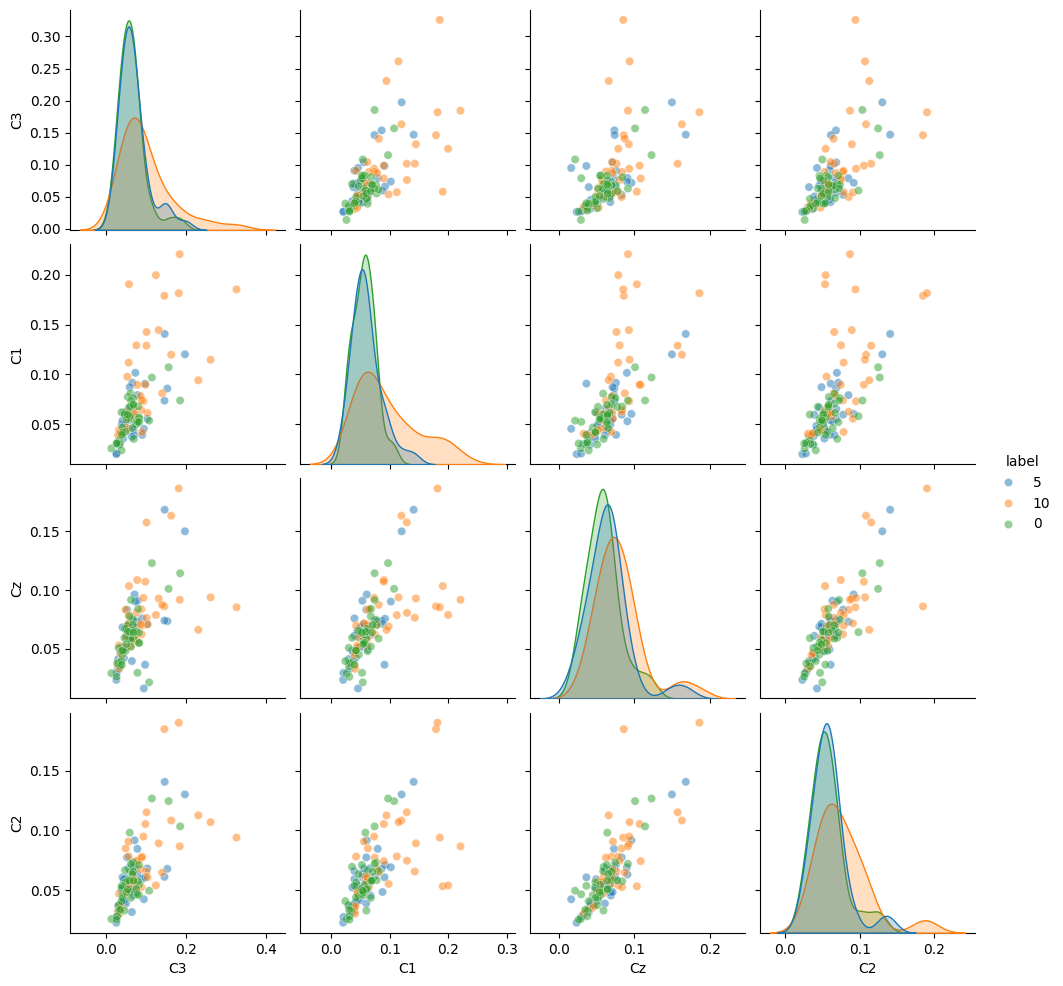

In [34]:
sns.pairplot(df_3[["C3", "C1", "Cz", "C2", "label"]], hue='label', diag_kind='kde', plot_kws={'alpha': 0.5})

In [35]:
p_values = []
significant_columns = []
thresh = 0.01
columns = df_3.columns

for column in columns:
    if column != 'label':
        
        test, p_val = compute_kruskal_wallis_anova(df_3, "label",  column)
        #test, p_val = compute_one_way_anova(df_3, "label",  column)
        
        #test, p_val = compute_t_test(big_df, "label",  column)
        #test, p_val = compute_paired_t_test(df_analisis, "label",  column)
        
        if(p_val < thresh):
            #sns.violinplot(x='label', y=column, data=big_df, hue='label', fill=False)
            #plt.show()
            p_values.append(p_val)
            significant_columns.append(column)
            print(f"Column: {column}, p-value: {p_val}")
        else:
            p_values.append(np.nan)


Column: FC3, p-value: 0.004138123633380553
Column: FCz, p-value: 0.0011656346727356793
Column: FC4, p-value: 0.00784252900683174
Column: CP3, p-value: 0.0007079733431069922
Column: C3, p-value: 0.009612359290553115
Column: C1, p-value: 0.000477973018902919
Column: Cz, p-value: 0.002044628319856514
Column: C2, p-value: 0.008050013831239483
Column: C4, p-value: 0.0008337338802369871
Column: CP4, p-value: 0.0014202133880836312
Column: P3, p-value: 0.009494425689131872
Column: P4, p-value: 0.0019446444288204183


In [36]:
mu_act = np.array(mu_act)
mu_rep = np.array(mu_rep)

beta_act = np.array(beta_act)
beta_rep = np.array(beta_rep)

gamma_act = np.array(gamma_act)
gamma_rep = np.array(gamma_rep)


In [37]:
mu_act.shape

(39, 16)

In [38]:
# Leer la información de los canales
x, y, _, _, ch_names = ib.eloc_reader('../ToolFiles/eloc16_bueno.txt')
ch_types = ["eeg"] * 16
info = mne.create_info(list(ch_names), sfreq=fs, ch_types=ch_types)
info.set_montage('standard_1020')



Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,19 points
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,10.00 Hz
Highpass,0.00 Hz
Lowpass,5.00 Hz


In [39]:
prom_mu_act_0 = ( np.nanmean(mu_act0, axis=0))
prom_mu_rep_0 = (np.nanmean(mu_rep0, axis=0))

prom_beta_act_0 = (np.nanmean(beta_act0, axis=0))
prom_beta_rep_0 = (np.nanmean(beta_rep0, axis=0))

prom_gamma_act_0 = (np.nanmean(gamma_act0, axis=0))
prom_gamma_rep_0 = (np.nanmean(gamma_rep0, axis=0))


prom_mu_act_5 = (np.nanmean(mu_act5, axis=0))
prom_mu_rep_5 = (np.nanmean(mu_rep5, axis=0))

prom_beta_act_5 = (np.nanmean(beta_act5, axis=0))
prom_beta_rep_5 = (np.nanmean(beta_rep5, axis=0))

prom_gamma_act_5 = (np.nanmean(gamma_act5, axis=0))
prom_gamma_rep_5 = (np.nanmean(gamma_rep5, axis=0))


prom_mu_act_10 = (np.nanmean(mu_act10, axis=0))
prom_mu_rep_10 = (np.nanmean(mu_rep10, axis=0))

prom_beta_act_10 = (np.nanmean(beta_act10, axis=0))
prom_beta_rep_10 = (np.nanmean(beta_rep10, axis=0))

prom_gamma_act_10 = (np.nanmean(gamma_act10, axis=0))
prom_gamma_rep_10 = (np.nanmean(gamma_rep10, axis=0))






In [40]:
prom_mu_act = (np.nanmean((prom_mu_act_5, prom_mu_act_10, prom_mu_rep_0), axis=0))
prom_mu_rep = (np.nanmean((prom_mu_rep_5, prom_mu_rep_10, prom_mu_rep_0), axis=0))

prom_beta_act = (np.nanmean((prom_beta_act_5, prom_beta_act_10, prom_beta_rep_0), axis=0))
prom_beta_rep = (np.nanmean((prom_beta_rep_5, prom_beta_rep_10, prom_beta_rep_0), axis=0))

prom_gamma_act = (np.nanmean((prom_gamma_act_5, prom_gamma_act_10, prom_gamma_rep_0), axis=0))
prom_gamma_rep = (np.nanmean((prom_gamma_rep_5, prom_gamma_rep_10, prom_gamma_rep_0), axis=0))


In [41]:
prom_mu_act.shape

(16,)

In [42]:
mini = np.min([prom_mu_act.min(), prom_mu_rep.min(), prom_beta_act.min(), prom_beta_rep.min(), prom_gamma_act.min(), prom_gamma_rep.min()])
maxi = np.max([prom_mu_act.max(), prom_mu_rep.max(), prom_beta_act.max(), prom_beta_rep.max(), prom_gamma_act.max(), prom_gamma_rep.max()])

In [43]:
%matplotlib inline

## Visualización de reposos - actividad

Los canales resaltados son los canales que tienen una diferencias estadísticamente significativa entre la actividad y el reposos

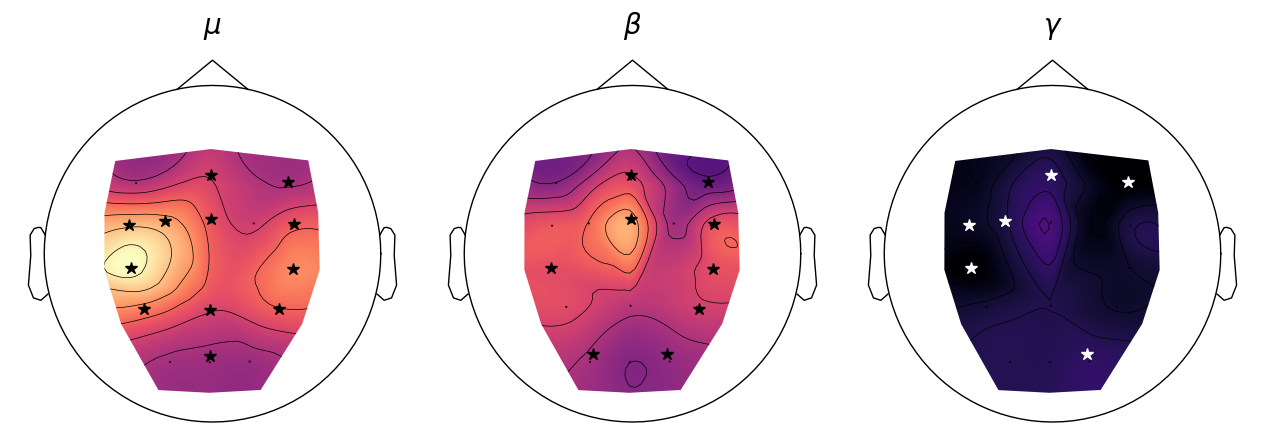

In [44]:
# Calcular la multiplicación de los promedios de actividad en las bandas
from matplotlib.colors import LinearSegmentedColormap

colors = [
    (1, 0.5, 0),  # Amarillo
    (1, 1, 1),  # Negro
    (0, 0.5, 1)   # Verde
]

# Crear el colormap
n_bins = 256  # Número de niveles en el colormap
cmap_name = 'yellow_black_green'
cmap_yop = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
cmap_yop = "magma"
#cmap_yop = "jet"

mult_mu = prom_mu_rep - prom_mu_act
mult_beta = prom_beta_rep - prom_beta_act
mult_gamma = prom_gamma_rep - prom_gamma_act

# Crear la figura y los ejes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotear los topomaps resultantes
mini = np.min([mult_mu.min(), mult_beta.min(), mult_gamma.min()])
maxi = np.max([mult_mu.max(), mult_beta.max(), mult_gamma.max()])


im, _ = mne.viz.plot_topomap(mult_mu, info, cmap=cmap_yop, axes=axes[0], vlim=(mini, maxi), show=False, extrapolate='local')
for electrode in mu_names:
    if electrode not in info.ch_names:
        continue
    idx = mne.pick_channels(info.ch_names, include=[electrode])  
    if idx:  
        pos = info['chs'][idx[0]]['loc'][:2]  
        axes[0].plot(pos[0] * 0.7, pos[1] * 0.7, "*", color="black", markersize=9, label=electrode)

#beta_info.plot_sensors(show_names=True, axes=axes[1], show=False)
mne.viz.plot_topomap(mult_beta, info, cmap=cmap_yop, axes=axes[1], vlim=(mini, maxi), show=False, extrapolate='local')
for electrode in beta_names:
    if electrode not in info.ch_names:
        continue
    idx = mne.pick_channels(info.ch_names, include=[electrode])  
    if idx:  
        pos = info['chs'][idx[0]]['loc'][:2]  
        axes[1].plot(pos[0] * 0.7, pos[1] * 0.7, "*", color="black", markersize=9, label=electrode)

#gamma_info.plot_sensors(show_names=True, axes=axes[2], show=False)
mne.viz.plot_topomap(mult_gamma, info, cmap=cmap_yop, axes=axes[2], vlim=(mini, maxi), show=False, extrapolate='local')
for electrode in gamma_names:
    if electrode not in info.ch_names:
        continue
    idx = mne.pick_channels(info.ch_names, include=[electrode])  
    if idx:  
        pos = info['chs'][idx[0]]['loc'][:2]  
        axes[2].plot(pos[0] * 0.7, pos[1] * 0.7, "*", color="white", markersize=9, label=electrode)

# Añadir una barra de color
#cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
#fig.colorbar(im, cax=cbar_ax)

# Añadir etiquetas de bandas en símbolos griegos
axes[0].set_title(r'$\mu$', fontsize=20)
axes[1].set_title(r'$\beta$', fontsize=20)
axes[2].set_title(r'$\gamma$', fontsize=20)

# Ajustar el diseño y mostrar la figura
plt.tight_layout(rect=[0.05, 0, 0.9, 0.95])  # Ajustar para dejar espacio para las barras de color y etiquetas

plt.show()

In [45]:
mult_mu_0 =  prom_mu_rep_0 - prom_mu_act_0 
mult_beta_0 =  prom_beta_rep_0 - prom_beta_act_0
mult_gamma_0 = prom_gamma_rep_0 - prom_gamma_act_0
 
mult_mu_5 =  prom_mu_rep_5 - prom_mu_act_5
mult_beta_5 =  prom_beta_rep_5 -  prom_beta_act_5
mult_gamma_5 =   prom_gamma_rep_5 - prom_gamma_act_5

mult_mu_10 =   prom_mu_rep_10 - prom_mu_act_10
mult_beta_10 =  prom_beta_rep_10 - prom_beta_act_10
mult_gamma_10 = prom_gamma_rep_10 - prom_gamma_act_10

mini = np.min([mult_mu_0.min(), mult_beta_0.min(), mult_gamma_0.min(), mult_mu_5.min(), mult_beta_5.min(), mult_gamma_5.min(), mult_mu_10.min(), mult_beta_10.min(), mult_gamma_10.min()])
maxi = np.max([mult_mu_0.max(), mult_beta_0.max(), mult_gamma_0.max(), mult_mu_5.max(), mult_beta_5.max(), mult_gamma_5.max(), mult_mu_10.max(), mult_beta_10.max(), mult_gamma_10.max()])


## Reposo - Actividad separado por ejercicios


C:\Users\fercy\AppData\Local\Temp\ipykernel_16804\312231351.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0, 0.9, 0.95]) ;


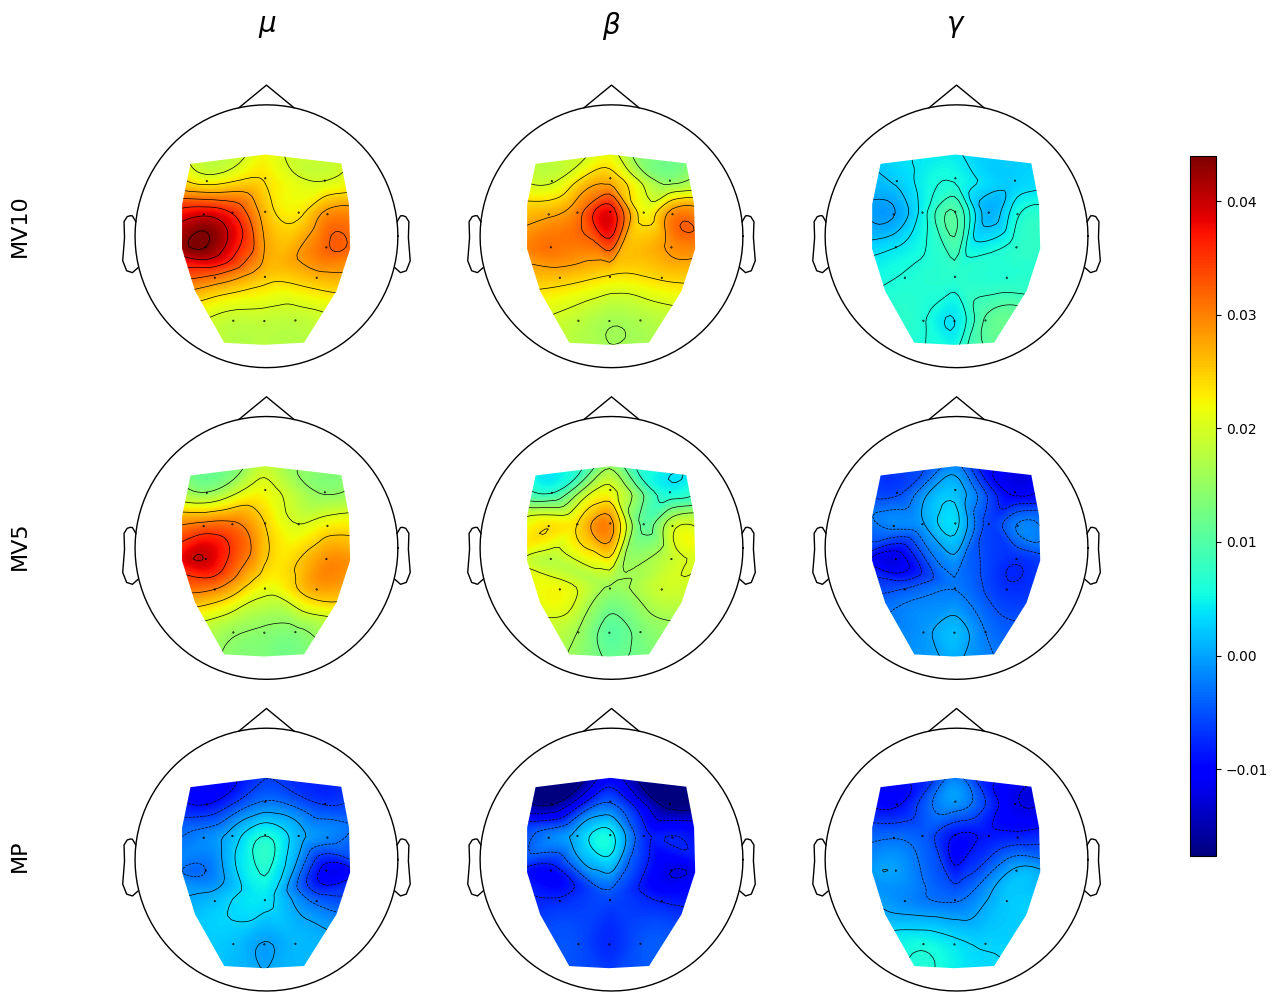

In [49]:

fig, axes = plt.subplots(3, 3, figsize=(13, 10))

cmap_yop = "jet"

im, _ = mne.viz.plot_topomap(mult_mu_10, info, cmap=cmap_yop, axes=axes[0, 0], vlim=(mini, maxi), show=False, extrapolate='local')
mne.viz.plot_topomap(mult_beta_10, info, cmap=cmap_yop, axes=axes[0, 1], vlim=(mini, maxi), show=False, extrapolate='local')
mne.viz.plot_topomap(mult_gamma_10, info, cmap=cmap_yop, axes=axes[0, 2], vlim=(mini, maxi), show=False, extrapolate='local')

im, _ = mne.viz.plot_topomap(mult_mu_5, info, cmap=cmap_yop, axes=axes[1, 0], vlim=(mini, maxi), show=False, extrapolate='local')
mne.viz.plot_topomap(mult_beta_5, info, cmap=cmap_yop, axes=axes[1, 1], vlim=(mini, maxi), show=False, extrapolate='local')
mne.viz.plot_topomap(mult_gamma_5, info, cmap=cmap_yop, axes=axes[1, 2], vlim=(mini, maxi), show=False, extrapolate='local')


im, _ = mne.viz.plot_topomap(mult_mu_0, info, cmap=cmap_yop, axes=axes[2, 0], vlim=(mini, maxi), show=False, extrapolate='local')
mne.viz.plot_topomap(mult_beta_0, info, cmap=cmap_yop, axes=axes[2, 1], vlim=(mini, maxi), show=False, extrapolate='local')
mne.viz.plot_topomap(mult_gamma_0, info, cmap=cmap_yop, axes=axes[2, 2], vlim=(mini, maxi), show=False, extrapolate='local')


# Añadir una barra de color
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax)

# Añadir etiquetas de bandas en símbolos griegos
fig.text(0.02, 0.78, 'MV10', va='center', ha='center', rotation='vertical', fontsize=16)
fig.text(0.02, 0.46, 'MV5', va='center', ha='center', rotation='vertical', fontsize=16)
fig.text(0.02, 0.15, 'MP', va='center', ha='center', rotation='vertical', fontsize=16)

# Añadir etiquetas de Actividad y Reposo
fig.text(0.21, 0.98, r'$\mu$', va='center', ha='center', fontsize=20)
fig.text(0.475, 0.98, r'$\beta$', va='center', ha='center', fontsize=20)
fig.text(0.74, 0.98, r'$\gamma$', va='center', ha='center', fontsize=20)

plt.tight_layout(rect=[0.05, 0, 0.9, 0.95]) ;

plt.show()